# 火星底图概览 (Basemap Overview)

本 Notebook 旨在：

- 载入与展示核心底图数据，用于后续地质与构造分析的统一空间参照。


In [1]:
from pathlib import Path
import rasterio, numpy as np, matplotlib.pyplot as plt
import rioxarray as rxr, geopandas as gpd
from rasterio.enums import Resampling
from rasterio.windows import Window

In [ ]:
BASE = Path('../resources/SIM3292_MarsGlobalGeologicGIS_20M/Basemaps')

tif_path = BASE / 'MOLA_Hillshade_Robinson_128ppd.tif'
print('Raster exists:', tif_path.exists())

# 降采倍率 (宽高同时 / 该因子); 建议 16~64 之间根据性能选择
downsample_factor = 32

# 可选像素窗口裁剪 (xmin, ymin, xmax, ymax); None 表示全图
pixel_window = None  # 例: (0,0,5000,3000)

Raster exists: True


CRS: PROJCS["Robinson_clon0_Mars_2000_Sphere",GEOGCS["GCS_Mars_2000_Sphere",DATUM["<custom>",SPHEROID["<custom>",3396190,0]],PRIMEM["Reference_Meridian",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Robinson"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH]]
Size (W,H): 39108 19676
Bands: 1 | Dtypes: ('uint8',)
Transform: | 463.08, 0.00,-9055157.87|
| 0.00,-463.08, 4555924.03|
| 0.00, 0.00, 1.00|
Downsampled shape: (614, 1222) Min/Max: 0 255


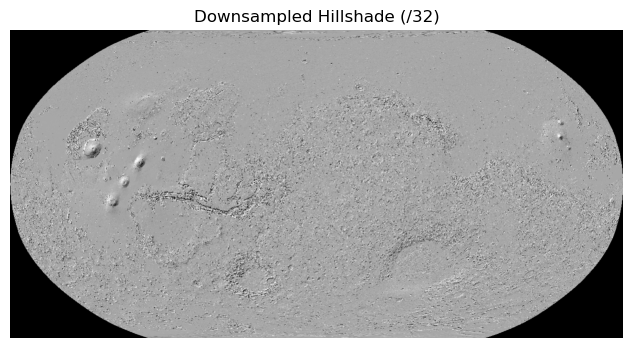

In [3]:
with rasterio.open(tif_path) as ds:
    print('CRS:', ds.crs)
    print('Size (W,H):', ds.width, ds.height)
    print('Bands:', ds.count, '| Dtypes:', ds.dtypes)
    print('Transform:', ds.transform)
    window = None
    if pixel_window:
        x0,y0,x1,y1 = pixel_window
        window = Window(col_off=x0, row_off=y0, width=x1-x0, height=y1-y0)
    out_h = (window.height if window else ds.height)//downsample_factor
    out_w = (window.width if window else ds.width)//downsample_factor
    data_small = ds.read(1, window=window, out_shape=(1, out_h, out_w), resampling=Resampling.bilinear)
print('Downsampled shape:', data_small.shape, 'Min/Max:', data_small.min(), data_small.max())
plt.figure(figsize=(10,4))
plt.imshow(data_small, cmap='gray')
plt.title(f'Downsampled Hillshade (/{downsample_factor})')
plt.axis('off')
plt.show()